# Introduction

In this notebook I will explore three different models for segmentation on this CamVid Dataset which has 32 classes. The models that I explored here are-
   
   - **Fully Convolutional Network model :** This model is proposed by [1](https://arxiv.org/pdf/1411.4038). Moreover, I also have insights from [here] (https://github.com/khalequzzamanlikhon/DeepLearning-ComputerVision/blob/master/08-Segmentation-Detection/01-Semantic-Segmentation.ipynb). Inspired by these I have defined a FCN using resnet50 as backbone followed by custom decoders.
   
   - **U-net architecture with attention mechanism :** I have defined a unet architecture with attentin mechanism
   
   - **Deeplabv3+ model :** Inspired by [2](https://arxiv.org/pdf/1802.02611), I have applied deeplabv3+ model here on this dataset.
   
   
Applying and comparing these models, I struggled to get a good mIoU. Even with the deeplabv3+. So my request to you, if you have come across this notebook and find anything that might improve the model's performance regarding mIoU please leave a message [here](https://www.linkedin.com/in/khalequzzaman-likhon/) mentioning this notebook. You can also find this notebook at [github](https://github.com/khalequzzamanlikhon/Image-Segmentation-CamVid)

# Loading libraries

In [2]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [3]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torchvision.models import resnet18
from torchvision.models import resnet50
import torchvision.models.segmentation as segmentation

# Try to import torchviz, warn if missing
try:
    from torchviz import make_dot
except ImportError:
    make_dot = None
    print("Warning: torchviz is not installed. Model visualization will be skipped. "
          "Install it with '!pip install torchviz' if needed.")

from torch.autograd import Variable
from sklearn.metrics import jaccard_score
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [1]:
import os

import sys

import subprocess

import importlib.util

import torch

from torch.utils.data import Dataset, DataLoader

import cv2

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from torchvision import transforms

import albumentations as A

from albumentations.pytorch import ToTensorV2

import torch.nn as nn

import torchvision.models as models

import torch.nn.functional as F

from torchvision.models import resnet18, resnet50

import torchvision.models.segmentation as segmentation

from torchviz import make_dot

from torch.autograd import Variable

from sklearn.metrics import jaccard_score

from torch.optim.lr_scheduler import ReduceLROnPlateau

def check_libraries():

    """

    Check if all required libraries are installed and functional.

    Returns a dictionary with library names and their status.

    """

    results = {}

    # Helper function to check if a module is imported

    def check_module(module_name):

        return importlib.util.find_spec(module_name) is not None

    # Helper function to run a simple test for a module

    def test_module(module_name, test_func, success_msg, fail_msg):

        try:

            test_func()

            return (True, success_msg)

        except Exception as e:

            return (False, f"{fail_msg}: {str(e)}")

    # Check os

    results['os'] = test_module(

        'os',

        lambda: os.path.exists('.'),

        'os: OK',

        'os: Failed'

    )

    # Check torch

    results['torch'] = test_module(

        'torch',

        lambda: torch.tensor([1.0]).to('cpu'),

        'torch: OK',

        'torch: Failed'

    )

    # Check torch.utils.data

    results['torch.utils.data'] = test_module(

        'torch.utils.data',

        lambda: isinstance(DataLoader, type),

        'torch.utils.data: OK',

        'torch.utils.data: Failed'

    )

    # Check cv2 (OpenCV)

    results['cv2'] = test_module(

        'cv2',

        lambda: cv2.__version__,

        f'cv2: OK (version {cv2.__version__})',

        'cv2: Failed'

    )

    # Check pandas

    results['pandas'] = test_module(

        'pandas',

        lambda: pd.DataFrame(),

        'pandas: OK',

        'pandas: Failed'

    )

    # Check matplotlib

    results['matplotlib'] = test_module(

        'matplotlib',

        lambda: plt.figure(),

        'matplotlib: OK',

        'matplotlib: Failed'

    )

    # Check numpy

    results['numpy'] = test_module(

        'numpy',

        lambda: np.array([1]),

        'numpy: OK',

        'numpy: Failed'

    )

    # Check torchvision.transforms

    results['torchvision.transforms'] = test_module(

        'torchvision.transforms',

        lambda: transforms.ToTensor(),

        'torchvision.transforms: OK',

        'torchvision.transforms: Failed'

    )

    # Check albumentations

    results['albumentations'] = test_module(

        'albumentations',

        lambda: A.Compose([A.Normalize()]),

        'albumentations: OK',

        'albumentations: Failed'

    )

    # Check albumentations.pytorch

    results['albumentations.pytorch'] = test_module(

        'albumentations.pytorch',

        lambda: ToTensorV2(),

        'albumentations.pytorch: OK',

        'albumentations.pytorch: Failed'

    )

    # Check torch.nn

    results['torch.nn'] = test_module(

        'torch.nn',

        lambda: nn.Linear(1, 1),

        'torch.nn: OK',

        'torch.nn: Failed'

    )

    # Check torchvision.models

    results['torchvision.models'] = test_module(

        'torchvision.models',

        lambda: resnet18(),

        'torchvision.models: OK',

        'torchvision.models: Failed'

    )

    # Check torchvision.models.segmentation

    results['torchvision.models.segmentation'] = test_module(

        'torchvision.models.segmentation',

        lambda: segmentation.deeplabv3_resnet50(),

        'torchvision.models.segmentation: OK',

        'torchvision.models.segmentation: Failed'

    )

    # Check torchviz (and Graphviz backend)

    results['torchviz'] = test_module(

        'torchviz',

        lambda: make_dot(torch.tensor([1.0]).mean()),

        'torchviz: OK',

        'torchviz: Failed'

    )

    # Check Graphviz executable (dot)

    results['graphviz_executable'] = test_module(

        'graphviz_executable',

        lambda: subprocess.run(['dot', '-V'], capture_output=True, check=True),

        'graphviz_executable: OK',

        'graphviz_executable: Failed (ensure Graphviz is installed and added to PATH)'

    )

    # Check sklearn.metrics

    results['sklearn.metrics'] = test_module(

        'sklearn.metrics',

        lambda: jaccard_score([0, 1], [0, 1]),

        'sklearn.metrics: OK',

        'sklearn.metrics: Failed'

    )

    # Check torch.optim.lr_scheduler

    results['torch.optim.lr_scheduler'] = test_module(

        'torch.optim.lr_scheduler',

        lambda: ReduceLROnPlateau(torch.optim.SGD(nn.Linear(1, 1).parameters(), lr=0.01)),

        'torch.optim.lr_scheduler: OK',

        'torch.optim.lr_scheduler: Failed'

    )

    # Print results

    print("\n=== Library Check Results ===")

    all_ok = True

    for lib, (status, message) in results.items():

        print(message)

        if not status:

            all_ok = False

    if all_ok:

        print("All libraries are OK!")

    else:

        print("Some libraries failed. Please check the error messages above.")

    return results

if __name__ == '__main__':

    # Run library check

    check_libraries()


=== Library Check Results ===
os: OK
torch: OK
torch.utils.data: OK
cv2: OK (version 4.12.0)
pandas: OK
matplotlib: OK
numpy: OK
torchvision.transforms: OK
albumentations: OK
albumentations.pytorch: OK
torch.nn: OK
torchvision.models: OK
torchvision.models.segmentation: OK
torchviz: OK
graphviz_executable: OK
sklearn.metrics: OK
torch.optim.lr_scheduler: OK
All libraries are OK!


<Figure size 640x480 with 0 Axes>

# Setting device

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# ---------- GPU Settings ----------
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
    torch.cuda.empty_cache()

Using GPU: Tesla T4


# Upload the dataset

In [4]:
import pandas as pd

def load_color_mapping(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)
    # Create a mapping from (r, g, b) to the class index
    color_mapping = {(row['r'], row['g'], row['b']): idx for idx, row in df.iterrows()}
    return color_mapping,df

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

base_path = '/content/drive/MyDrive/input/CamVid'
print("Files in CamVid:", os.listdir(base_path))

Files in CamVid: ['class_dict.csv', 'test', 'test_labels', 'train_labels', 'val', 'val_labels', 'train']


In [7]:
import os
import cv2
from torch.utils.data import Dataset

class CamVidDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.images = sorted(os.listdir(images_dir))
        self.masks = sorted(os.listdir(masks_dir))
        assert len(self.images) == len(self.masks), "Number of images and masks must match"

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path)

        # Optionally apply transforms (e.g. albumentations)
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

        return image, mask

# Data preparation

In [9]:
import pandas as pd

def load_color_mapping(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)
    # Create a mapping from (r, g, b) to the class index
    color_mapping = {(row['r'], row['g'], row['b']): idx for idx, row in df.iterrows()}
    return color_mapping,df


In [10]:
color_mapping,df=load_color_mapping("/content/drive/MyDrive/input/CamVid/class_dict.csv")
print(color_mapping)

{(64, 128, 64): 0, (192, 0, 128): 1, (0, 128, 192): 2, (0, 128, 64): 3, (128, 0, 0): 4, (64, 0, 128): 5, (64, 0, 192): 6, (192, 128, 64): 7, (192, 192, 128): 8, (64, 64, 128): 9, (128, 0, 192): 10, (192, 0, 64): 11, (128, 128, 64): 12, (192, 0, 192): 13, (128, 64, 64): 14, (64, 192, 128): 15, (64, 64, 0): 16, (128, 64, 128): 17, (128, 128, 192): 18, (0, 0, 192): 19, (192, 128, 128): 20, (128, 128, 128): 21, (64, 128, 192): 22, (0, 0, 64): 23, (0, 64, 64): 24, (192, 64, 128): 25, (128, 128, 0): 26, (192, 128, 192): 27, (64, 0, 64): 28, (192, 192, 0): 29, (0, 0, 0): 30, (64, 192, 0): 31}


## Custom Dataset class

In [11]:
class CamVidDataset(Dataset):
    def __init__(self, image_dir, label_dir, color_mapping, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.color_mapping = color_mapping
        self.transform = transform
        self.image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')])
        self.label_files = sorted([os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.png')])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load the image and label
        image = cv2.imread(self.image_files[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        label = cv2.imread(self.label_files[idx]) # Load as RGB
        label=cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        #Convert the RGB label to class indices
        label = self.convert_rgb_to_class(label)
#         Apply transformations, if any
        if self.transform:
            augmented = self.transform(image=image, mask=label)
            image = augmented['image']
            label = augmented['mask']

        return image, label.long()

    def convert_rgb_to_class(self, label):
        """Convert RGB mask to class indices."""
        # Create an empty mask with the same shape as the label
        class_mask = np.zeros((label.shape[0], label.shape[1]), dtype=int)

        # Iterate over each pixel and assign the class index based on RGB value
        for rgb, class_idx in self.color_mapping.items():
            mask = (label[:, :, 0] == rgb[0]) & (label[:, :, 1] == rgb[1]) & (label[:, :, 2] == rgb[2])
            class_mask[mask] = class_idx

        return class_mask


## Data augmentation

In [12]:
def get_transforms(train=True):
    if train:
        return A.Compose([
            A.Resize(400, 520),
            A.RandomCrop(height=352, width=480),
            A.HorizontalFlip(p=0.5),
            A.Rotate(limit=15, p=0.5),
            A.GaussianBlur(blur_limit=(3, 5), p=0.3),
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            A.Normalize(mean=(0.390, 0.405, 0.414), std=(0.274, 0.285, 0.297)),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Resize(352, 480),
            A.Normalize(mean=(0.390, 0.405, 0.414), std=(0.274, 0.285, 0.297)),
            ToTensorV2()
        ])


In [13]:
# Instantiate datasets with the color map
train_dataset = CamVidDataset('/content/drive/MyDrive/input/CamVid/train', '/content/drive/MyDrive/input/CamVid/train_labels', color_mapping, transform=get_transforms(train=True))
val_dataset = CamVidDataset('/content/drive/MyDrive/input/CamVid/val', '/content/drive/MyDrive/input/CamVid/val_labels', color_mapping, transform=get_transforms(train=False))
test_dataset = CamVidDataset('/content/drive/MyDrive/input/CamVid/test', '/content/drive/MyDrive/input/CamVid/test_labels', color_mapping, transform=get_transforms(train=False))

In [14]:
# Dataset Exploration and Class Balance Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd

def analyze_dataset_balance(dataset, color_mapping, df, dataset_name="Dataset"):
    """
    Analyze class distribution in the dataset
    """
    print(f"\n=== {dataset_name} Analysis ===")
    # Get class names from the dataframe
    class_names = df['name'].tolist()
    # Count pixels for each class
    class_counts = Counter()
    total_pixels = 0
    print("Analyzing class distribution...")
    for i in range(min(len(dataset), 100)):  # Sample first 100 images for efficiency
        _, mask = dataset[i]
        mask_np = mask.numpy()
        # Count pixels for each class
        unique, counts = np.unique(mask_np, return_counts=True)
        for class_idx, count in zip(unique, counts):
            class_counts[class_idx] += count
            total_pixels += count
    # Create class distribution plot
    plt.figure(figsize=(15, 8))
    # Prepare data for plotting
    class_indices = list(range(len(class_names)))
    pixel_counts = [class_counts.get(i, 0) for i in class_indices]
    percentages = [count/total_pixels*100 for count in pixel_counts]
    # Create bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(class_names)), percentages, color='skyblue', edgecolor='navy')
    plt.xlabel('Class Index')
    plt.ylabel('Percentage of Pixels (%)')
    plt.title(f'{dataset_name} - Class Distribution')
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.ylim(0, max(percentages) * 1.1)
    # Add percentage labels on bars
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        if pct > 0.5:  # Only show labels for classes with >0.5% pixels
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)
    # Create pie chart for top classes
    plt.subplot(1, 2, 2)
    # Get top 10 classes by pixel count
    sorted_classes = sorted(zip(class_indices, percentages), key=lambda x: x[1], reverse=True)
    top_classes = sorted_classes[:10]
    if top_classes:
        top_indices, top_percentages = zip(*top_classes)
        top_names = [class_names[i] for i in top_indices]
        # Create pie chart
        colors = plt.cm.Set3(np.linspace(0, 1, len(top_names)))
        wedges, texts, autotexts = plt.pie(top_percentages, labels=top_names, autopct='%1.1f%%',
                                           colors=colors, startangle=90)
        plt.title(f'{dataset_name} - Top 10 Classes')
    plt.tight_layout()
    plt.show()
    # Print statistics
    print(f"\nTotal pixels analyzed: {total_pixels:,}")
    print(f"Number of classes: {len(class_names)}")
    print(f"Classes with pixels: {len([c for c in class_counts.values() if c > 0])}")
    # Show class imbalance statistics
    non_zero_percentages = [p for p in percentages if p > 0]
    if non_zero_percentages:
        print(f"Most common class: {class_names[np.argmax(percentages)]} ({max(percentages):.2f}%)")
        print(f"Least common class: {class_names[np.argmin([p if p > 0 else float('inf') for p in percentages])]} ({min([p for p in percentages if p > 0]):.2f}%)")
        print(f"Class imbalance ratio: {max(non_zero_percentages)/min(non_zero_percentages):.1f}:1")
    return class_counts, percentages, class_names

# Analyze all datasets
print("Analyzing dataset class balance...")
train_class_counts, train_percentages, class_names = analyze_dataset_balance(train_dataset, color_mapping, df, "Training Dataset")
val_class_counts, val_percentages, _ = analyze_dataset_balance(val_dataset, color_mapping, df, "Validation Dataset")
test_class_counts, test_percentages, _ = analyze_dataset_balance(test_dataset, color_mapping, df, "Test Dataset")

# Compare class distributions across datasets
plt.figure(figsize=(16, 8))
x = np.arange(len(class_names))
width = 0.25

plt.bar(x - width, train_percentages, width, label='Train', alpha=0.8)
plt.bar(x, val_percentages, width, label='Validation', alpha=0.8)
plt.bar(x + width, test_percentages, width, label='Test', alpha=0.8)

plt.xlabel('Classes')
plt.ylabel('Percentage of Pixels (%)')
plt.title('Class Distribution Comparison Across Datasets')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Analyzing dataset class balance...

=== Training Dataset Analysis ===
Analyzing class distribution...


KeyboardInterrupt: 

## visualizing few input and label images

In [15]:
import matplotlib.pyplot as plt


def visualize_samples(dataset, color_mapping, num_samples=3):
    # Create a reverse mapping from class index to RGB values for visualization
    reverse_color_mapping = {v: k for k, v in color_mapping.items()}

    fig, axs = plt.subplots(num_samples, 2, figsize=(10, 5*num_samples))

    for i in range(num_samples):
        # Get a sample from the dataset
        image, label = dataset[i]
        image = image.permute(1, 2, 0).numpy()  # Convert to HWC format for plotting
        label = label.numpy()


        # Create an RGB mask for visualization
        label_rgb = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
        for class_idx, rgb in reverse_color_mapping.items():
            label_rgb[label == class_idx] = rgb

        # Plot the image and label
        axs[i, 0].imshow(image)
        axs[i, 0].set_title(f'Sample {i + 1} - Image')
        axs[i, 0].axis('off')

        axs[i, 1].imshow(label_rgb)
        axs[i, 1].set_title(f'Sample {i + 1} - Label')
        axs[i, 1].axis('off')


    plt.tight_layout()
    plt.show()


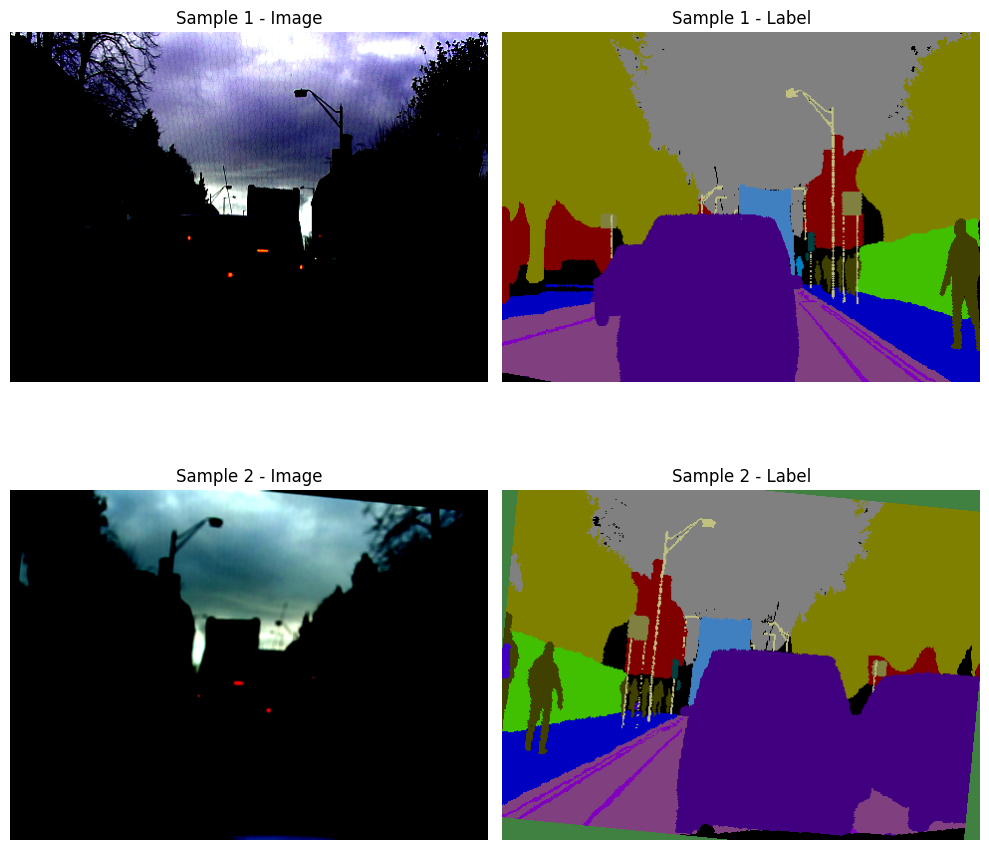

In [19]:
visualize_samples(train_dataset,color_mapping, num_samples=2)

In [16]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Implementing the Fully Convolutional Network (FCN) -- Scratch

In [17]:
class FCNSegmentation(nn.Module):
    def __init__(self, num_classes):
        super(FCNSegmentation, self).__init__()

        # ResNet-50 as encoder backbone
        resnet = models.resnet50(pretrained=True)

        # Encoder using ResNet50 layers, excluding the fully connected part
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])

        # Decoder for upsampling
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2048, 1024, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.ConvTranspose2d(128, num_classes, kernel_size=4, stride=2, padding=1),
            nn.Upsample(size=(352, 480), mode='bilinear', align_corners=True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# U-net Using efficientnet


In [18]:
class AttentionBlock(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super(AttentionBlock, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        return x * psi

class UNetResNet50(nn.Module):
    def __init__(self, num_classes):
        super(UNetResNet50, self).__init__()

        # Pre-trained ResNet-50 backbone
        resnet = resnet50(weights='IMAGENET1K_V1')

        self.encoder1 = nn.Sequential(resnet.conv1, resnet.bn1, resnet.relu)
        self.encoder2 = nn.Sequential(resnet.maxpool, resnet.layer1)
        self.encoder3 = resnet.layer2
        self.encoder4 = resnet.layer3
        self.encoder5 = resnet.layer4

        # Decoder with attention
        self.attention5 = AttentionBlock(F_g=2048, F_l=1024, F_int=512)
        self.decoder5 = nn.Sequential(
            nn.Conv2d(2048 + 1024, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True)
        )

        self.attention4 = AttentionBlock(F_g=1024, F_l=512, F_int=256)
        self.decoder4 = nn.Sequential(
            nn.Conv2d(1024 + 512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.attention3 = AttentionBlock(F_g=512, F_l=256, F_int=128)
        self.decoder3 = nn.Sequential(
            nn.Conv2d(512 + 256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )

        self.attention2 = AttentionBlock(F_g=256, F_l=64, F_int=32)
        self.decoder2 = nn.Sequential(
            nn.Conv2d(256 + 64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        # Final output layer
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)  # (B, 64, H/2, W/2)
        e2 = self.encoder2(e1) # (B, 256, H/4, W/4)
        e3 = self.encoder3(e2) # (B, 512, H/8, W/8)
        e4 = self.encoder4(e3) # (B, 1024, H/16, W/16)
        e5 = self.encoder5(e4) # (B, 2048, H/32, W/32)

        # Decoder with attention
        d5 = F.interpolate(e5, size=e4.size()[2:], mode='bilinear', align_corners=True)
        e4_att = self.attention5(d5, e4)
        d5 = torch.cat((d5, e4_att), dim=1)
        d5 = self.decoder5(d5)

        d4 = F.interpolate(d5, size=e3.size()[2:], mode='bilinear', align_corners=True)
        e3_att = self.attention4(d4, e3)
        d4 = torch.cat((d4, e3_att), dim=1)
        d4 = self.decoder4(d4)

        d3 = F.interpolate(d4, size=e2.size()[2:], mode='bilinear', align_corners=True)
        e2_att = self.attention3(d3, e2)
        d3 = torch.cat((d3, e2_att), dim=1)
        d3 = self.decoder3(d3)

        d2 = F.interpolate(d3, size=e1.size()[2:], mode='bilinear', align_corners=True)
        e1_att = self.attention2(d2, e1)
        d2 = torch.cat((d2, e1_att), dim=1)
        d2 = self.decoder2(d2)

        # Final output
        output = self.final_conv(d2)
        output = F.interpolate(output, size=(352,480), mode='bilinear', align_corners=True)

        return output

## Deeplabv3

In [19]:
class DeepLabV3Plus(nn.Module):
    def __init__(self, num_classes):
        super(DeepLabV3Plus, self).__init__()
        # Load the pre-trained DeepLabV3+ model
        self.model = segmentation.deeplabv3_resnet50(pretrained=True)

        # Modify the classifier to output num_classes
        self.model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1, 1))

    def forward(self, x):
        # Forward pass
        return self.model(x)['out']

# Visualize model architecture

# Training

## callbacks(early stopping)

In [24]:
import torch.optim as optim
import numpy as np

class EarlyStopping:
    def __init__(self, patience=5, delta=0.01):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_score is None or val_loss < self.best_score - self.delta:
            self.best_score = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# loss function combined (dice + jaccard )

In [20]:
# dice loss

def dice_loss(pred, target, smooth=1e-6):
    # Convert target to one-hot encoding
    # target shape: (batch_size, height, width) -> (batch_size, num_classes, height, width)
    target = F.one_hot(target, num_classes=pred.shape[1]).permute(0, 3, 1, 2).float()

    pred = pred.contiguous()
    target = target.contiguous()

    # Compute Dice loss
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    loss = 1 - ((2. * intersection + smooth) /
                (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth))

    # Average loss across all classes
    return loss.mean()

# Jaccard Loss

class JaccardLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(JaccardLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        # Convert y_true to one-hot encoding (assumed input as (batch_size, height, width))
        y_true = F.one_hot(y_true, num_classes=y_pred.shape[1]).permute(0, 3, 1, 2).float()

        # Apply sigmoid to y_pred for binary/multiclass segmentation if necessary
        y_pred = torch.sigmoid(y_pred)

        # Flatten the tensors
        y_pred = y_pred.contiguous().view(y_pred.shape[0], -1)
        y_true = y_true.contiguous().view(y_true.shape[0], -1)

        # Compute intersection and union
        intersection = (y_pred * y_true).sum(dim=1)
        union = y_pred.sum(dim=1) + y_true.sum(dim=1) - intersection

        # Compute Jaccard Index (IoU)
        iou = (intersection + self.smooth) / (union + self.smooth)

        # Return Jaccard loss (1 - IoU)
        return 1 - iou.mean()



# Combined Loss (dice + jaccard)
class CombinedLoss(nn.Module):
    def __init__(self, dice_weight=0.5, jaccard_weight=0.5, smooth=1e-6):
        super(CombinedLoss, self).__init__()
        self.dice_weight = dice_weight
        self.jaccard_weight = jaccard_weight
        self.dice_loss = dice_loss
        self.jaccard_loss = JaccardLoss(smooth=smooth)

    def forward(self, y_pred, y_true):
        dice = self.dice_loss(y_pred, y_true)
        jaccard = self.jaccard_loss(y_pred, y_true)
        return self.dice_weight * dice + self.jaccard_weight * jaccard


combined_loss = CombinedLoss(dice_weight=0.7, jaccard_weight=0.3)

## Training setup

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Models
model_fcn = FCNSegmentation(num_classes=32).to(device)
model_unet = UNetResNet50(num_classes=32).to(device)
model_deeplab = DeepLabV3Plus(num_classes=32)

# Convert BatchNorm to GroupNorm
def convert_bn_to_gn(module):
    """Recursively replace all BatchNorm2d layers with GroupNorm."""
    for child_name, child in module.named_children():
        if isinstance(child, nn.BatchNorm2d):
            setattr(module, child_name, nn.GroupNorm(num_groups=32, num_channels=child.num_features))
        else:
            convert_bn_to_gn(child)

convert_bn_to_gn(model_deeplab)
model_deeplab.to(device)

# Loss function
criterion = combined_loss

# Early Stopping
early_stopping1 = EarlyStopping(patience=7, delta=0.001)
early_stopping2 = EarlyStopping(patience=7, delta=0.001)
early_stopping3 = EarlyStopping(patience=7, delta=0.001)

# Optimizers
optimizer_fcn = optim.Adam(model_fcn.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_unet = optim.Adam(model_unet.parameters(), lr=1e-4, weight_decay=1e-5)
optimizer_deeplab = optim.Adam(model_deeplab.parameters(), lr=1e-4, weight_decay=1e-5)

# Learning Rate Schedulers (Remove verbose for compatibility)
scheduler_fcn = ReduceLROnPlateau(optimizer_fcn, mode='min', factor=0.1, patience=5)
scheduler_unet = ReduceLROnPlateau(optimizer_unet, mode='min', factor=0.1, patience=3)
scheduler_deeplab = ReduceLROnPlateau(optimizer_deeplab, mode='min', factor=0.1, patience=3)

NameError: name 'EarlyStopping' is not defined

# Saving model architecture as image

In [ ]:
# # few images from trainloader
# batch = next(iter(train_loader))  # Get the first batch
# images, labels = batch
# images = images.to(device)

# # Pass the batch through the models
# y1 = model_fcn(images)
# y2 = model_unet(images)
# y3 = model_deeplab(images)

# make_dot(y1, params=dict(list(model_fcn.named_parameters()))).render("fcn_architecture", format="png")
# make_dot(y2, params=dict(list(model_unet.named_parameters()))).render("Unet_architecture", format="png")
# make_dot(y3, params=dict(list(model_deeplab.named_parameters()))).render("deeplab_architecture", format="png")

In [38]:
def training_loop(model,optimizer,scheduler,early_stopping):

    num_epochs = 100
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct_train_pixels = 0
        total_train_pixels = 0

        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            # Apply softmax to get probabilities for multi-class segmentation
            outputs = torch.softmax(outputs, dim=1)

            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            # Compute train accuracy (for each pixel)
            predicted_masks = torch.argmax(outputs, dim=1)
            correct_train_pixels += (predicted_masks == masks).sum().item()
            total_train_pixels += torch.numel(masks)

        # Calculate training accuracy
        train_acc = correct_train_pixels / total_train_pixels
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        val_loss = 0
        correct_val_pixels = 0
        total_val_pixels = 0
        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                outputs = torch.softmax(outputs, dim=1)

                loss = criterion(outputs, masks)
                val_loss += loss.item()

                # Compute validation accuracy (for each pixel)
                predicted_masks = torch.argmax(outputs, dim=1)
                correct_val_pixels += (predicted_masks == masks).sum().item()
                total_val_pixels += torch.numel(masks)
        #clear gpu memeory after each training
        torch.cuda.empty_cache()

        # Calculate validation accuracy
        val_acc = correct_val_pixels / total_val_pixels
        val_accuracies.append(val_acc)

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
              f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

        # Scheduler step
        scheduler.step(val_loss)

        # Early stopping
        early_stopping(val_loss)
        if hasattr(early_stopping, 'early_stop') and early_stopping.early_stop:
            print("Early stopping triggered")
            break
    return train_accuracies,val_accuracies,train_losses,val_losses

In [39]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [40]:
train_accs_fcn,val_accs_fcn,train_loss_fcn,val_loss_fcn=training_loop(model_fcn,optimizer_fcn,scheduler_fcn,early_stopping1)

OutOfMemoryError: CUDA out of memory. Tried to allocate 84.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 16.12 MiB is free. Process 15763 has 14.72 GiB memory in use. Of the allocated memory 14.54 GiB is allocated by PyTorch, and 60.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
train_accs_unet,val_accs_unet,train_loss_unet,val_loss_unet=training_loop(model_unet,optimizer_unet,scheduler_unet,early_stopping2)

In [ ]:
train_accs_deeplab,val_accs_deeplab,train_loss_deeplab,val_loss_deeplab=training_loop(model_deeplab,optimizer_deeplab,scheduler_deeplab,early_stopping3)

# Accuracy and Loss: plot function

In [ ]:
# Plot Loss and Accuracy curves in one row with two columns
def plot_acc_loss(train_accuracies,val_accuracies,train_losses,val_losses):
    plt.figure(figsize=(10, 6))

    # Plot Loss curves
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Val Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    # Plot Accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(val_accuracies, label='Val Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.tight_layout()  # Automatically adjust subplot parameters to give some padding
    plt.show()


In [ ]:
plot_acc_loss(train_accs_fcn,val_accs_fcn,train_loss_fcn,val_loss_fcn)

In [ ]:
plot_acc_loss(train_accs_unet,val_accs_unet,train_loss_unet,val_loss_unet)

In [ ]:
plot_acc_loss(train_accs_deeplab,val_accs_deeplab,train_loss_deeplab,val_loss_deeplab)

# Evaluation

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    miou_scores = []
    pixel_accuracies = []
    all_images = []
    all_masks = []
    all_predictions = []

    with torch.no_grad():
        for images, masks in dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Compute mIoU
            miou = jaccard_score(masks.cpu().numpy().flatten(), predictions.cpu().numpy().flatten(), average='macro')
            miou_scores.append(miou)

            # Compute Pixel Accuracy
            pixel_acc = (predictions == masks).sum().item() / (masks.shape[0] * masks.shape[1] * masks.shape[2])
            pixel_accuracies.append(pixel_acc)

            # Collect images, masks, and predictions for visualization
            all_images.append(images.cpu())
            all_masks.append(masks.cpu())
            all_predictions.append(predictions.cpu())

    # Calculate average metrics
    avg_miou = np.mean(miou_scores)
    avg_pixel_acc = np.mean(pixel_accuracies)

    print(f'Average mIoU: {avg_miou:.4f}, Average Pixel Accuracy: {avg_pixel_acc:.4f}')

    # Concatenate all collected tensors
    all_images_tensor = torch.cat(all_images)
    all_masks_tensor = torch.cat(all_masks)
    all_predictions_tensor = torch.cat(all_predictions)

    return avg_miou, avg_pixel_acc, all_images_tensor, all_masks_tensor, all_predictions_tensor


## Average mIoU

In [ ]:
# Evaluate the model and get predictions
avg_miou_fcn, avg_pixel_acc_fcn, images, masks, predictions_fcn = evaluate_model(model_fcn, test_loader)
print(f'Test mIoU on fcn : {avg_miou_fcn:.4f}, Test Pixel Accuracy: {avg_pixel_acc_fcn:.4f}')

In [ ]:
avg_miou_unet, avg_pixel_acc_unet, images, masks, predictions_unet = evaluate_model(model_unet, test_loader)
print(f'Test mIoU on unet: {avg_miou_unet:.4f}, Test Pixel Accuracy for unet: {avg_pixel_acc_unet:.4f}')

In [ ]:
avg_miou_deeplab, avg_pixel_acc_deeplab, images, masks, predictions_deeplab = evaluate_model(model_deeplab, test_loader)
print(f'Test mIoU on deeplab: {avg_miou_deeplab:.4f}, Test Pixel Accuracy for deeplab: {avg_pixel_acc_deeplab:.4f}')

## Visualize predictions

In [ ]:
def visualize_predictions(images, masks, predictions, color_mapping, num_images=3):
    reverse_color_mapping = {v: k for k, v in color_mapping.items()}  # Reverse the mapping for easy lookup

    for i in range(min(num_images, len(images))):
        plt.figure(figsize=(12, 4))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i].numpy().transpose(1, 2, 0))  # Assuming images are in CHW format
        plt.title('Original Image')
        plt.axis('off')

        # Ground Truth Mask (RGB)
        plt.subplot(1, 3, 2)
        gt_mask_rgb = class_to_rgb(masks[i].numpy(), reverse_color_mapping)
        plt.imshow(gt_mask_rgb)
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # Predicted Mask (RGB)
        plt.subplot(1, 3, 3)
        pred_mask_rgb = class_to_rgb(predictions[i].numpy(), reverse_color_mapping)
        plt.imshow(pred_mask_rgb)
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.show()



In [ ]:
def class_to_rgb(mask, reverse_color_mapping):
    """Convert class indices to RGB values using the reverse color mapping."""
    height, width = mask.shape
    rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

    for class_idx, rgb in reverse_color_mapping.items():
        rgb_mask[mask == class_idx] = rgb

    return rgb_mask

In [ ]:
visualize_predictions(images, masks, predictions_fcn, color_mapping, num_images=3)

In [ ]:
visualize_predictions(images, masks, predictions_unet, color_mapping, num_images=3)

In [ ]:
visualize_predictions(images, masks, predictions_deeplab, color_mapping, num_images=3)